<a href="https://colab.research.google.com/github/trucphuongbvc/Phantichdulieuhcsau/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/babies.txt",sep="\s+")
df

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


In [4]:
df_cohutthuoc = df[df['smoke'] == 1]
df_khonghutthuoc = df[df['smoke'] == 0]

In [5]:
from scipy.stats import kurtosis
from scipy.stats import skew
import numpy as np
d = {'TH1: Bà mẹ hút thuốc' : pd.Series([df_cohutthuoc['bwt'].count(),df_cohutthuoc['bwt'].min(),
                        df_cohutthuoc['bwt'].max(),df_cohutthuoc['bwt'].mean(),
                        df_cohutthuoc['bwt'].std(skipna=True),df_cohutthuoc['bwt'].var(skipna=True),
                        df_cohutthuoc['bwt'].median(),df_cohutthuoc['bwt'].quantile(.0),
                        df_cohutthuoc['bwt'].quantile(.25),df_cohutthuoc['bwt'].quantile(.5),
                        df_cohutthuoc['bwt'].quantile(.75),df_cohutthuoc['bwt'].quantile(1),
                        df_cohutthuoc['bwt'].quantile(.75)-df_cohutthuoc['bwt'].quantile(.25),
                        df_cohutthuoc['bwt'].kurtosis()+3,df_cohutthuoc['bwt'].skew()],
                       index=['Số lượng','Min','Max','Mean','Sd','Var','Median','Quantile 0%',
                              'Quantile 25%','Quantile 50%','Quantile 75%','Quantile 100%','IQR',
                              'Kurtosis','Skewness']),
      'TH2: Bà mẹ không hút thuốc' : pd.Series([df_khonghutthuoc['bwt'].count(),df_khonghutthuoc['bwt'].min(),
                        df_khonghutthuoc['bwt'].max(),df_khonghutthuoc['bwt'].mean(),
                        df_khonghutthuoc['bwt'].std(skipna=True),df_khonghutthuoc['bwt'].var(skipna=True),
                        df_khonghutthuoc['bwt'].median(),df_khonghutthuoc['bwt'].quantile(.0),
                        df_khonghutthuoc['bwt'].quantile(.25),df_khonghutthuoc['bwt'].quantile(.5),
                        df_khonghutthuoc['bwt'].quantile(.75),df_khonghutthuoc['bwt'].quantile(1),
                        df_khonghutthuoc['bwt'].quantile(.75)-df_khonghutthuoc['bwt'].quantile(.25),
                        df_khonghutthuoc['bwt'].kurtosis()+3,df_khonghutthuoc['bwt'].skew()],
                       index=['Số lượng','Min','Max','Mean','Sd','Var','Median','Quantile 0%',
                              'Quantile 25%','Quantile 50%','Quantile 75%','Quantile 100%','IQR',
                              'Kurtosis','Skewness'])
     }
data = pd.DataFrame(d)
data

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc
Số lượng,484.000000,742.000000
Min,58.000000,55.000000
Max,163.000000,176.000000
Mean,114.109504,123.047170
Sd,18.098946,17.398689
Var,327.571835,302.714371
Median,115.000000,123.000000
Quantile 0%,58.000000,55.000000
Quantile 25%,102.000000,113.000000
Quantile 50%,115.000000,123.000000


In [6]:
# Sự khác biệt về tính biến động của dữ liệu được thể hiện qua bảng sau:
data_1 = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc' : pd.Series([df_cohutthuoc['bwt'].std(skipna=True),df_cohutthuoc['bwt'].var(skipna=True),
                                        df_cohutthuoc['bwt'].max()-df_cohutthuoc['bwt'].min(),
                                        df_cohutthuoc['bwt'].quantile(.75)-df_cohutthuoc['bwt'].quantile(.25)],
                                       index=['Sd','Var','Range','IQR']),
    'TH2: Bà mẹ không hút thuốc' : pd.Series([df_khonghutthuoc['bwt'].std(skipna=True),df_khonghutthuoc['bwt'].var(skipna=True),
                                        df_khonghutthuoc['bwt'].max()-df_khonghutthuoc['bwt'].min(),
                                        df_khonghutthuoc['bwt'].quantile(.75)-df_khonghutthuoc['bwt'].quantile(.25)],
                                       index=['Sd','Var','Range','IQR'])
})
data_1['Chênh lệch (TH2-TH1)'] = data_1['TH2: Bà mẹ không hút thuốc']-data_1['TH1: Bà mẹ hút thuốc']
data_1

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc,Chênh lệch (TH2-TH1)
Sd,18.098946,17.398689,-0.700257
Var,327.571835,302.714371,-24.857464
Range,105.000000,121.000000,16.000000
IQR,24.000000,21.000000,-3.000000


In [7]:
# Sự khác biệt về hình dạng phân bố của dữ liệu: được thể hiện qua bảng sau:
data_2 = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc' : pd.Series([df_cohutthuoc['bwt'].skew(),df_cohutthuoc['bwt'].kurtosis()+3],
                                       index=['Skewness','Kurtosis']),
    'TH2: Bà mẹ không hút thuốc' : pd.Series([df_khonghutthuoc['bwt'].skew(),df_khonghutthuoc['bwt'].kurtosis()+3],
                                       index=['Skewness','Kurtosis'])
})
data_2['Chênh lệch (TH2-TH1)'] = data_2['TH2: Bà mẹ không hút thuốc']-data_2['TH1: Bà mẹ hút thuốc']
data_2

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc,Chênh lệch (TH2-TH1)
Skewness,-0.033700,-0.187363,-0.153664
Kurtosis,3.000408,4.052213,1.051805


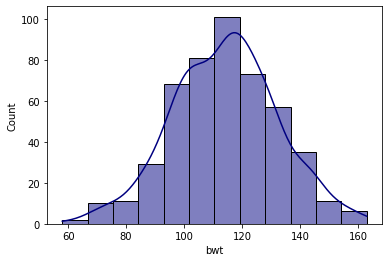

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = df_cohutthuoc,x = 'bwt',color = 'navy',kde = True, bins=12)

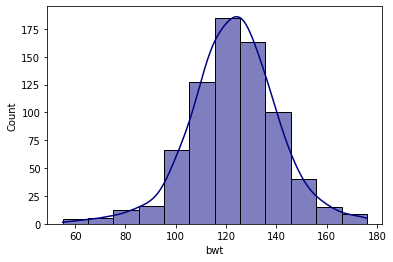

In [9]:
sns.histplot(data = df_khonghutthuoc,x = 'bwt',color = 'navy',kde = True, bins=12)

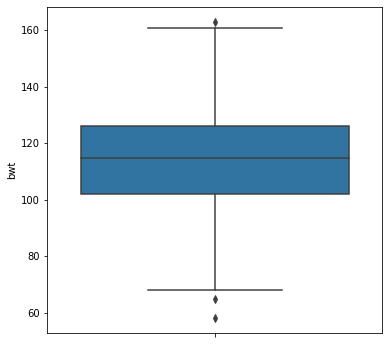

In [10]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df_cohutthuoc['bwt'])

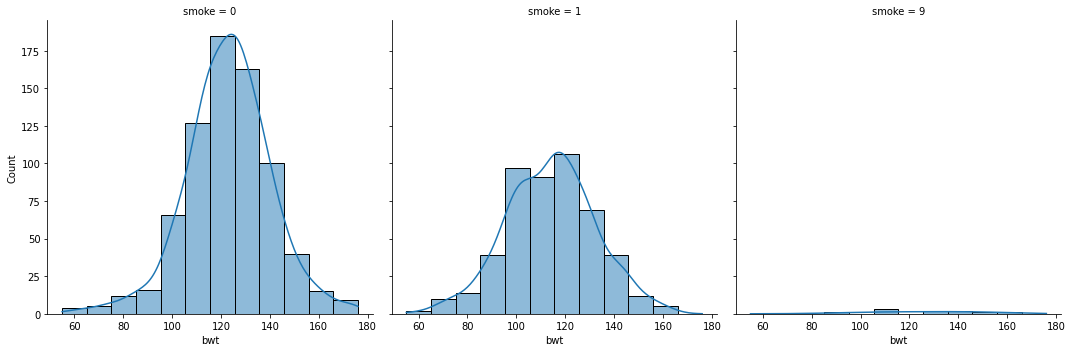

In [12]:

sns.displot(df, x="bwt", col="smoke", kde=True,bins=12)

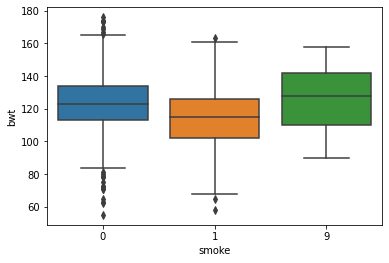

In [13]:
sns.boxplot(x="smoke", y="bwt", data=df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


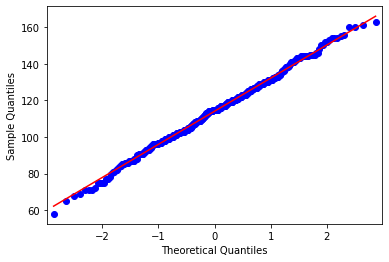

In [14]:
from scipy.stats.stats import pearsonr
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
# QQ-plot phân bố của bà mẹ có hút thuốc
qqplot_cohutthuoc = qqplot(df_cohutthuoc['bwt'],line='s')
plt.show()